In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data
data = pd.read_csv('/datasets/eteplygina/combined_data.csv')
data = data.drop(['time_rounded', 'shock_time', 'ethnicity', 'gender', 'height', 'weight', 'relative_time', 'age'], axis=1)

print("Shape of original data array:", data.shape)
print(data)

# Create label dictionary
label_dict = data.groupby('id')['label'].first().to_dict()
print("Label Dictionary:", label_dict)  

# Split data into train and test sets while preserving IDs
train_ids, test_ids = train_test_split(data['id'].unique(), test_size=0.2, random_state=42)
print(train_ids)

# Split labels into train and test sets
train_labels_dict = {id: label_dict[id] for id in train_ids}
test_labels_dict = {id: label_dict[id] for id in test_ids}

train_labels = np.array(list(train_labels_dict.values()))
test_labels = np.array(list(test_labels_dict.values()))

# Filter the DataFrame to extract the rows corresponding to train_ids and test_ids
train_data_indices = data['id'].isin(train_ids)
test_data_indices = data['id'].isin(test_ids)
print(train_data_indices)

# Normalize the data for train and test sets separately
scaler = StandardScaler()

# Filter the DataFrame to extract the rows corresponding to train_ids and test_ids
train_data_filtered = data[train_data_indices].drop(['label'], axis=1)
test_data_filtered = data[test_data_indices].drop(['label'], axis=1)

# Apply normalization to train data
train_data_filtered.iloc[:, 1:] = scaler.fit_transform(train_data_filtered.iloc[:, 1:]).astype('float64')

# Apply normalization to test data
test_data_filtered.iloc[:, 1:] = scaler.transform(test_data_filtered.iloc[:, 1:]).astype('float64')

print(train_data_filtered)
print(test_data_filtered)

# Print shapes after filtering
print("Shape of filtered train data DataFrame:", train_data_filtered.shape)
print("Shape of filtered test data DataFrame:", test_data_filtered.shape)
print("Shape of train labels array after filtering:", train_labels.shape)
print("Shape of test labels array after filtering:", test_labels.shape)

# Count unique positive and negative IDs in train and test sets
train_pos_ids = np.sum(train_labels == 1)
train_neg_ids = np.sum(train_labels == 0)
test_pos_ids = np.sum(test_labels == 1)
test_neg_ids = np.sum(test_labels == 0)

print("Train Set:")
print("Number of unique positive IDs:", train_pos_ids)
print("Number of unique negative IDs:", train_neg_ids)

print("Test Set:")
print("Number of unique positive IDs:", test_pos_ids)
print("Number of unique negative IDs:", test_neg_ids)

# Pad sequences for train and test data separately
max_sequence_length_train = train_data_filtered.groupby('id').size().max()
max_sequence_length_test = test_data_filtered.groupby('id').size().max()
print(max_sequence_length_train, max_sequence_length_test)

# For training data
train_sequences = []
for id in train_ids:
    id_data = train_data_filtered[train_data_filtered['id'] == id].drop(['id'], axis=1).values
    padded_sequence = pad_sequences([id_data], maxlen=max_sequence_length_train, padding='post', truncating='post', dtype='float64', value=100000.0)[0]
    train_sequences.append(padded_sequence)
train_data = np.array(train_sequences)

# For test data
test_sequences = []
for id in test_ids:
    id_data = test_data_filtered[test_data_filtered['id'] == id].drop(['id'], axis=1).values
    padded_sequence = pad_sequences([id_data], maxlen=max_sequence_length_train, padding='post', truncating='post', dtype='float64', value=100000.0)[0]
    test_sequences.append(padded_sequence)
test_data = np.array(test_sequences)
print(len(test_sequences))

train_data = np.array(train_sequences)
test_data = np.array(test_sequences)
print(train_data.shape)
print(test_data.shape)
print(train_data)

# Expand dimensions for labels
train_labels = np.expand_dims(train_labels, axis=1)
test_labels = np.expand_dims(test_labels, axis=1)

print("Shape of expanded labels array:")
print("Train labels:", train_labels)
print("Test labels:", test_labels.shape)


Shape of original data array: (1254724, 9)
               id  label  heartrate         sbp        dbp        mbp  \
0        30004144      1  75.000000  146.000000  74.000000  94.000000   
1        30004144      1  62.666667  140.333333  58.666667  86.000000   
2        30004144      1  74.666667  143.666667  61.000000  89.333333   
3        30004144      1  66.500000  138.500000  62.000000  89.000000   
4        30004144      1  66.000000  145.000000  61.500000  91.500000   
...           ...    ...        ...         ...        ...        ...   
1254719  38486358      0  60.000000  120.000000  88.000000  99.000000   
1254720  38486358      0  56.000000  119.000000  88.000000  99.000000   
1254721  38486358      0  56.000000  119.000000  88.000000  99.000000   
1254722  38486358      0  56.000000  125.000000  82.000000  94.000000   
1254723  38486358      0  56.000000  125.000000  82.000000  94.000000   

         respiration  temperature       spo2  
0          18.000000        36.33

In [5]:
# Repeat each label across all time steps
train_labels_repeated = np.repeat(train_labels, 345, axis=1)

# Reshape to add the third dimension
train_labels_reshaped = np.expand_dims(train_labels_repeated, axis=2)

# Print the shape of the new train labels array
print("Shape of train_labels_reshaped:", train_labels_reshaped)

test_labels_repeated = np.repeat(test_labels, 345, axis=1)

# Reshape to add the third dimension
test_labels_reshaped = np.expand_dims(test_labels_repeated, axis=2)

# Print the shape of the new test labels array
print("Shape of test_labels_reshaped:", test_labels_reshaped.shape)

Shape of train_labels_reshaped: [[[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]]
Shape of test_labels_reshaped: (3145, 345, 1)


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.layers import Masking, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, Callback
from keras_tuner import HyperModel, RandomSearch, BayesianOptimization
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score, confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tcn import TCN
import keras_tuner as kt

# Define the custom weighted binary crossentropy loss
def weighted_binary_crossentropy(y_true, y_pred):
    positive_weight = 4
    negative_weight = 1
    y_true = tf.cast(y_true, tf.float32)
    weights = y_true * positive_weight + (1 - y_true) * negative_weight
    weights = tf.expand_dims(weights, axis=-1)
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    weighted_bce = bce * weights
    return tf.reduce_mean(weighted_bce)

# Register the custom loss function
keras.utils.get_custom_objects().update({"weighted_binary_crossentropy": weighted_binary_crossentropy})

# Custom callback to calculate and print recall after each epoch
class RecallCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data
        self.best_recall = 0

    def on_epoch_end(self, epoch, logs=None):
        val_data, val_labels = self.validation_data
        val_pred = (self.model.predict(val_data) > 0.5).astype(int)
        val_labels_seq = np.array([1 if np.any(labels) else 0 for labels in val_labels])
        val_pred_seq = np.array([1 if np.any(labels) else 0 for labels in val_pred])
        recall = recall_score(val_labels_seq, val_pred_seq)
        logs['val_recall'] = recall  # Log recall for monitoring
        print(f'\nEpoch {epoch + 1}, Val Recall: {recall:.4f}')

class TCNHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential([
            Masking(mask_value=100000.0, input_shape=(max_sequence_length_train, train_data.shape[2])),
            TCN(
                input_shape=(max_sequence_length_train, train_data.shape[2]),
                nb_filters=hp.Int('nb_filters', min_value=16, max_value=64, step=16),
                return_sequences=True,
                dilations=[1, 2, 4, 8],
                kernel_size=hp.Int('kernel_size', min_value=2, max_value=6, step=2),
                padding='causal'
            ),
            Dense(1, activation='sigmoid')
        ])
        
        model.compile(
            optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
            loss=weighted_binary_crossentropy,
            metrics=['accuracy', tf.keras.metrics.Recall(name='val_recall')]  # Use accuracy and recall as the main metrics
        )
        
        return model

tuner = kt.BayesianOptimization(
    TCNHyperModel(),
    objective=kt.Objective('val_recall', direction='max'),
    max_trials=50,
    directory='my_dir',
    project_name='tcn_hyperparameter_tuning'
)

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
recall_callback = RecallCallback(validation_data=(test_data, test_labels_reshaped))

tuner.search(
    train_data, train_labels_reshaped,
    epochs=30,
    validation_data=(test_data, test_labels_reshaped),
    callbacks=[recall_callback]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    train_data, train_labels_reshaped,
    epochs=30,
    batch_size=32,
    validation_data=(test_data, test_labels_reshaped),
    callbacks=[recall_callback]
)
# Print model summary
best_model.summary()


Reloading Tuner from my_dir/tcn_hyperparameter_tuning/tuner0.json
Epoch 1/10
99/99 [==============================] - 1s 4ms/step loss: 0.9254 - accuracy: 0.7841 - val

Epoch 1, Val Recall: 0.9271
395/395 [==============================] - 73s 183ms/step - loss: 0.9254 - accuracy: 0.7841 - val_recall: 0.9271 - val_loss: 0.8686 - val_accuracy: 0.7871 - val_val_recall: 0.0364
Epoch 2/10
99/99 [==============================] - 0s 4ms/step loss: 0.8263 - accuracy: 0.7957 - val_

Epoch 2, Val Recall: 0.9134
395/395 [==============================] - 71s 179ms/step - loss: 0.8263 - accuracy: 0.7957 - val_recall: 0.9134 - val_loss: 0.8514 - val_accuracy: 0.7894 - val_val_recall: 0.0499
Epoch 3/10
99/99 [==============================] - 0s 4ms/step loss: 0.8139 - accuracy: 0.7989 - val_

Epoch 3, Val Recall: 0.8267
395/395 [==============================] - 70s 177ms/step - loss: 0.8139 - accuracy: 0.7989 - val_recall: 0.8267 - val_loss: 0.8451 - val_accuracy: 0.7920 - val_val_recall: 0.0396

In [21]:

threshold = 0.5
train_predictions = (model.predict(train_data) > threshold).astype(int)
test_predictions = (model.predict(test_data) > threshold).astype(int)


99/99 [==============================] - 0s 1ms/step


In [22]:
# Max Aggregation
train_predictions_seq = (np.max(train_predictions, axis=1) > threshold).astype(int)
test_predictions_seq = (np.max(test_predictions, axis=1) > threshold).astype(int)


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_labels_seq = np.array([1 if np.any(labels) else 0 for labels in test_labels])

# Max Aggregation
test_accuracy_max = accuracy_score(test_labels_seq, test_predictions_seq)


test_precision_max = precision_score(test_labels_seq, test_predictions_seq)
test_recall_max = recall_score(test_labels_seq, test_predictions_seq)
test_f1_max = f1_score(test_labels_seq, test_predictions_seq)


print("Max Aggregation Accuracy - Test:", test_accuracy_max)
print("Max Aggregation Precision - Test:", test_precision_max)
print("Max Aggregation Recall - Test:", test_recall_max)
print("Max Aggregation F1 - Test:", test_f1_max)

Max Aggregation Accuracy - Test: 0.4368471035137702
Max Aggregation Precision - Test: 0.2613878246062154
Max Aggregation Recall - Test: 0.9331306990881459
Max Aggregation F1 - Test: 0.40838044562687065
Mean Aggregation Accuracy - Test: 0.7907565685343463
Mean Aggregation Precision - Test: 0.0
Mean Aggregation Recall - Test: 0.0
Mean Aggregation F1 - Test: 0.0


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Masking, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, Callback
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score, confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
import keras
from tcn import TCN
# Define the custom weighted binary crossentropy loss
def weighted_binary_crossentropy(y_true, y_pred):
    positive_weight = 4
    negative_weight = 1
    y_true = tf.cast(y_true, tf.float32)
    weights = y_true * positive_weight + (1 - y_true) * negative_weight
    weights = tf.expand_dims(weights, axis=-1)
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    weighted_bce = bce * weights
    return tf.reduce_mean(weighted_bce)

# Register the custom loss function
keras.utils.get_custom_objects().update({"weighted_binary_crossentropy": weighted_binary_crossentropy})

# Custom callback to calculate and print recall after each epoch
class RecallCallback(Callback):
    def __init__(self, val_data, val_labels):
        super().__init__()
        self.val_data = val_data
        self.val_labels = val_labels
        self.best_recall = 0

    def on_epoch_end(self, epoch, logs=None):
        val_probabilities = self.model.predict(self.val_data)
        threshold = 0.5  
        val_predictions = (val_probabilities > threshold).astype(int)

        # Max Aggregation
        val_predictions_seq_max = (np.max(val_predictions, axis=1) > threshold).astype(int)

        # Mean Aggregation
        val_predictions_seq_mean = (np.mean(val_predictions, axis=1) > threshold).astype(int)

        # Aggregate ground truth labels for the validation set
        val_labels_seq = np.array([1 if np.any(labels) else 0 for labels in self.val_labels])

        recall_max = recall_score(val_labels_seq, val_predictions_seq_max)
        recall_mean = recall_score(val_labels_seq, val_predictions_seq_mean)

        current_recall = max(recall_max, recall_mean)
        if current_recall > self.best_recall:
            self.best_recall = current_recall
        
        print(f"Epoch {epoch+1} - Max Aggregation Recall: {recall_max:.4f}, Mean Aggregation Recall: {recall_mean:.4f}")
        logs['val_recall'] = current_recall  # Log recall for monitoring

# Initialize the TCN model with the given hyperparameters
nb_filters = 32
kernel_size = 6
learning_rate = 0.009158900495900792

model = Sequential([
    Masking(mask_value=100000.0, input_shape=(max_sequence_length_train, train_data.shape[2])),
    TCN(
        input_shape=(max_sequence_length_train, train_data.shape[2]),
        nb_filters=nb_filters,
        return_sequences=True,
        dilations=[1, 2, 4, 8],
        kernel_size=kernel_size,
        padding='causal'
    ),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=weighted_binary_crossentropy,
    metrics=['accuracy']  
)

recall_callback = RecallCallback(val_data=test_data, val_labels=test_labels_reshaped)

history = model.fit(
    train_data, train_labels_reshaped,
    epochs=30,
    batch_size=32,
    validation_data=(test_data, test_labels_reshaped),
    callbacks=[recall_callback]
)


Epoch 1/30
99/99 [==============================] - 1s 7ms/step loss: 
Epoch 1 - Max Aggregation Recall: 0.5493, Mean Aggregation Recall: 0.0697
394/394 [==============================] - 76s 189ms/step - loss: 0.8460 - accuracy: 0.7952 - val_loss: 0.7252 - val_accuracy: 0.8215 - val_recall: 0.5493
Epoch 2/30
99/99 [==============================] - 1s 8ms/step
Epoch 2 - Max Aggregation Recall: 0.8095, Mean Aggregation Recall: 0.1224
394/394 [==============================] - 92s 233ms/step - loss: 0.7704 - accuracy: 0.8072 - val_loss: 0.7333 - val_accuracy: 0.8225 - val_recall: 0.8095
Epoch 3/30
99/99 [==============================] - 1s 8ms/step
Epoch 3 - Max Aggregation Recall: 0.7670, Mean Aggregation Recall: 0.1207
394/394 [==============================] - 87s 220ms/step - loss: 0.7602 - accuracy: 0.8073 - val_loss: 0.6939 - val_accuracy: 0.8269 - val_recall: 0.7670
Epoch 4/30
99/99 [==============================] - 1s 7ms/step loss:
Epoch 4 - Max Aggregation Recall: 0.6565, Me

99/99 [==============================] - 1s 6ms/step
Max Aggregation Accuracy - Test: 0.6626391096979333
Max Aggregation Precision - Test: 0.34222815210140095
Max Aggregation Recall - Test: 0.8724489795918368
Max Aggregation F1 - Test: 0.49161475802587445


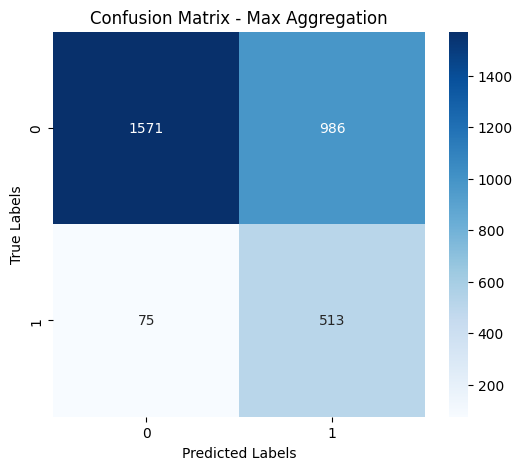

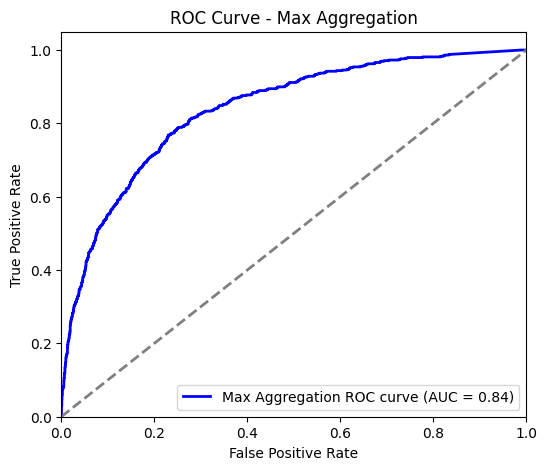

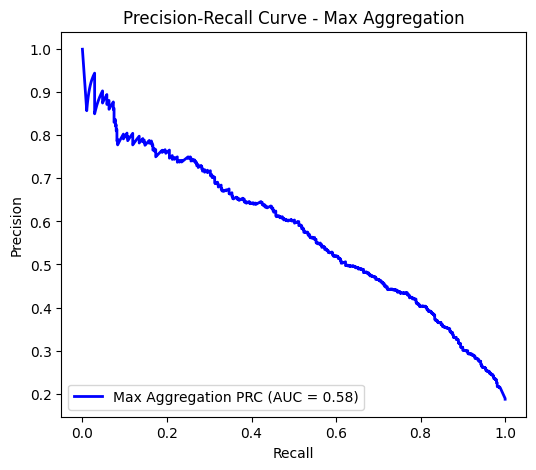

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Generate raw prediction probabilities
test_probs = model.predict(test_data).flatten()

threshold = 0.5 

# Max Aggregation using raw probabilities
test_predictions_seq = (np.max(test_probs.reshape(-1, max_sequence_length_train), axis=1) > threshold).astype(int)

# Ensure labels are binary for evaluation
test_labels_seq = np.array([1 if np.any(labels) else 0 for labels in test_labels])

# Evaluation metrics for Max Aggregation
test_accuracy_max = accuracy_score(test_labels_seq, test_predictions_seq)
test_precision_max = precision_score(test_labels_seq, test_predictions_seq)
test_recall_max = recall_score(test_labels_seq, test_predictions_seq)
test_f1_max = f1_score(test_labels_seq, test_predictions_seq)

print("Max Aggregation Accuracy - Test:", test_accuracy_max)
print("Max Aggregation Precision - Test:", test_precision_max)
print("Max Aggregation Recall - Test:", test_recall_max)
print("Max Aggregation F1 - Test:", test_f1_max)

# Confusion Matrix
conf_matrix_max = confusion_matrix(test_labels_seq, test_predictions_seq)

# Calculate ROC curve and AUC for Max Aggregation using raw probabilities
fpr_max, tpr_max, _ = roc_curve(test_labels_seq, np.max(test_probs.reshape(-1, max_sequence_length_train), axis=1))
roc_auc_max = roc_auc_score(test_labels_seq, np.max(test_probs.reshape(-1, max_sequence_length_train), axis=1))

# Calculate Precision-Recall curve and AUC for Max Aggregation using raw probabilities
precision_max, recall_max, _ = precision_recall_curve(test_labels_seq, np.max(test_probs.reshape(-1, max_sequence_length_train), axis=1))
prc_auc_max = auc(recall_max, precision_max)

# Plotting the confusion matrices
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_max, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Max Aggregation')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting the ROC curve for Max Aggregation
plt.figure(figsize=(6, 5))
plt.plot(fpr_max, tpr_max, color='blue', lw=2, label='Max Aggregation ROC curve (AUC = %0.2f)' % roc_auc_max)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Max Aggregation')
plt.legend(loc="lower right")
plt.show()

# Plotting the Precision-Recall curve for Max Aggregation
plt.figure(figsize=(6, 5))
plt.plot(recall_max, precision_max, color='blue', lw=2, label='Max Aggregation PRC (AUC = %0.2f)' % prc_auc_max)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Max Aggregation')
plt.legend(loc="lower left")
plt.show()

In [28]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (None, 336, 7)            0         
                                                                 
 tcn_2 (TCN)                 (None, 336, 32)           44864     
                                                                 
 dense_2 (Dense)             (None, 336, 1)            33        
                                                                 
Total params: 44,897
Trainable params: 44,897
Non-trainable params: 0
_________________________________________________________________
